### Project 2
#### Customer Segmentation
#### Dataset: marketing campaign: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')

In [3]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,2012-09-04,2014-03-08,2013-08-21,2014-02-10,2014-01-19
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


### Column Description

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
# Verifying columns without description:

In [5]:
df.Z_CostContact.unique()

array([3])

In [6]:
df.Z_Revenue.unique()

array([11])

In [7]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### The selected approach will be:
1. Create a feature for the days since customer enrollment: Today - DT_customer
2. Encode Categorical Vars
3. Scaling
4. Dimensionality Reduction
5. K-means clustering
6. GMM clustering

In [9]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [10]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [11]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer) 

In [12]:
from datetime import datetime

In [13]:
import numpy as np
import math

In [14]:
df['Dt_days'] = df['Dt_Customer'].apply(lambda x: math.floor((datetime.today() - x) / np.timedelta64(1, 'D')))

In [15]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,4,7,0,0,0,0,0,0,1,3705
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,5,0,0,0,0,0,0,0,3155
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,3354
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,4,6,0,0,0,0,0,0,0,3181
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,3203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,3423
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,5,7,0,0,0,1,0,0,0,3061
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,3197
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,3198


In [16]:
pd.options.display.max_columns = 30

In [17]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_days
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,3395.582143
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,202.122512
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3042.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3222.750000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3397.500000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3571.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3741.000000


In [18]:
# Outliers detection and removal
cols = ['Year_Birth', 'Income', 'Recency'] + [name for name in df.columns if 'Mnt' in name]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set_style('darkgrid')

/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/saul/an

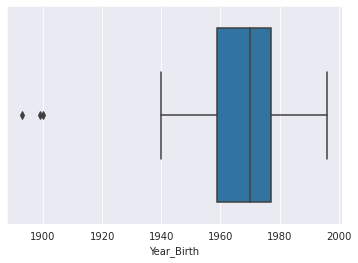

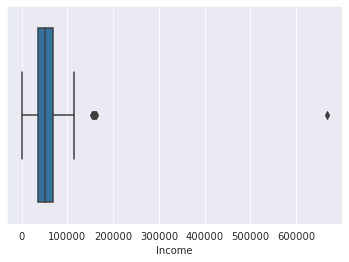

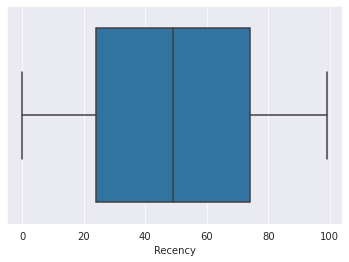

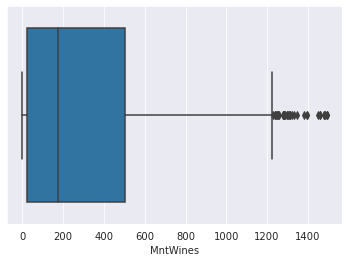

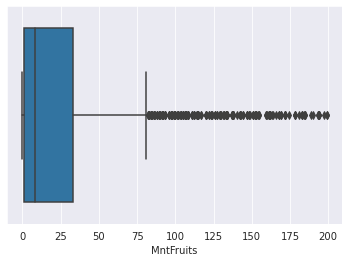

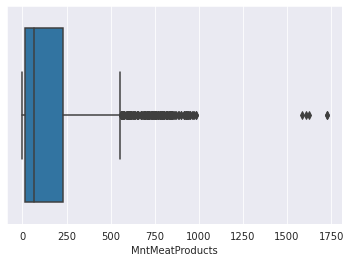

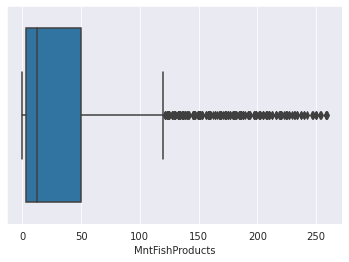

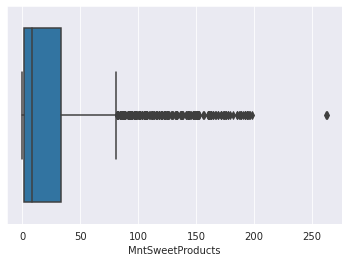

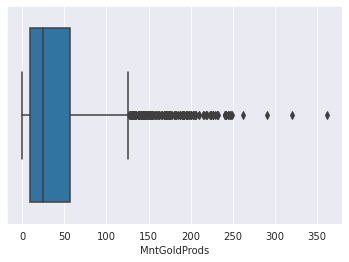

In [21]:
for col in cols:
    plt.figure()
    sns.boxplot(df[col])
    
    

In [22]:
# To confirm the outliers in the purchase amounts we create a new var including the sum of all product amounts:
df['MntTotal'] = df.MntFishProducts + df.MntFruits + df.MntGoldProds + df.MntMeatProducts + df.MntSweetProducts + df.MntWines

/home/saul/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MntTotal'>

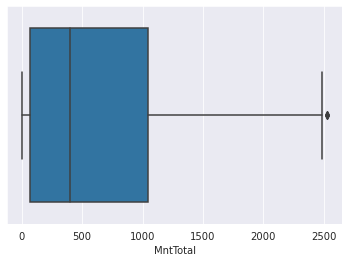

In [23]:
sns.boxplot(df.MntTotal)

In [24]:
# WE only remove outliers for Year birth and Income

In [25]:
# year birth quantiles
q1_year = df.Year_Birth.quantile(0.05)
q3_year = df.Year_Birth.quantile(0.95)
iqr_year = q3_year - q1_year
# Income quantiles
q1_inc = df.Income.quantile(0.05)
q3_inc = df.Income.quantile(0.95)
iqr_inc = q3_inc - q1_inc

In [26]:
# Limits
low_year = q1_year - 1.5 * iqr_year
high_year = q3_year + 1.5 * iqr_year
#
low_inc = q1_inc - 1.5 * iqr_inc
high_inc = q3_inc + 1.5 * iqr_inc

In [27]:
df = df[(df.Year_Birth > low_year) & (df.Year_Birth < high_year)]

In [28]:
df = df[(df.Income > low_inc) & (df.Income < high_inc)]

In [29]:
df.reset_index(inplace=True, drop=True)

In [30]:
# Now remove unnecesary columns
df.drop(columns=['ID', 'Dt_Customer', 'MntTotal'], inplace=True)

In [31]:
# Encode categorical variables with DictVectorizer (One Hot)

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
df_dict = df.to_dict(orient='records')

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
X_feats = dv.fit_transform(df_dict)

In [36]:
dv.get_feature_names_out()

array(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Dt_days', 'Education=2n Cycle',
       'Education=Basic', 'Education=Graduation', 'Education=Master',
       'Education=PhD', 'Income', 'Kidhome', 'Marital_Status=Absurd',
       'Marital_Status=Alone', 'Marital_Status=Divorced',
       'Marital_Status=Married', 'Marital_Status=Single',
       'Marital_Status=Together', 'Marital_Status=Widow',
       'Marital_Status=YOLO', 'MntFishProducts', 'MntFruits',
       'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Response',
       'Teenhome', 'Year_Birth'], dtype=object)

TODO: CONSIDER DEALING WITH NEW CATEGORIES IN PRODUCTION

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
X_std = StandardScaler().fit_transform(X_feats)

In [39]:
from sklearn.decomposition import PCA

We test 5 and 3 PCA dimensions:

In [40]:
X_pca = PCA(n_components=5).fit_transform(X_std)

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

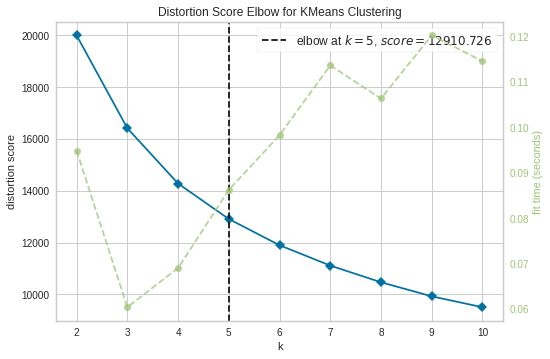

CPU times: user 4.31 s, sys: 135 ms, total: 4.44 s
Wall time: 1.51 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [42]:
%%time
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(10))
elbow.fit(X_pca)
elbow.show()

In [43]:
X_pca = PCA(n_components=3).fit_transform(X_std)

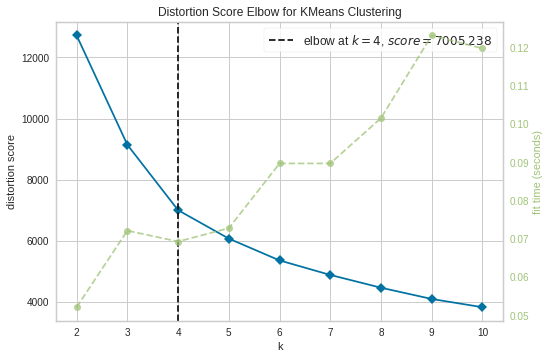

CPU times: user 3.88 s, sys: 96.2 ms, total: 3.98 s
Wall time: 1.26 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
%%time
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(10))
elbow.fit(X_pca)
elbow.show()

In [45]:
# We now try without features of promotions:
cols = [col for col in df.columns if 'Accepted' in col] + ['Response', 'Complain']

In [46]:
df.drop(columns=cols, inplace=True)

In [47]:
df_dict = df.to_dict(orient='records')

In [48]:
dv = DictVectorizer(sparse=False)

In [49]:
X_feats = dv.fit_transform(df_dict)

In [50]:
X_std = StandardScaler().fit_transform(X_feats)

In [51]:
X_pca = PCA(n_components=5).fit_transform(X_std)

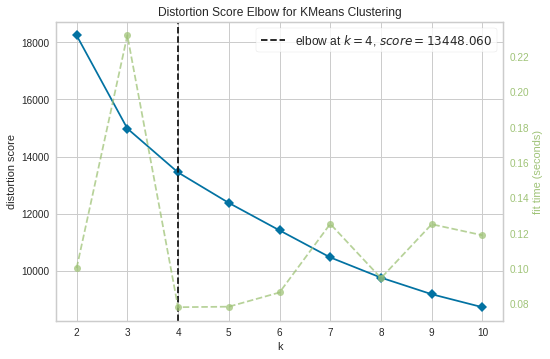

CPU times: user 4.49 s, sys: 164 ms, total: 4.65 s
Wall time: 1.49 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
%%time
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(10))
elbow.fit(X_pca)
elbow.show()

In [53]:
X_pca = PCA(n_components=3).fit_transform(X_std)

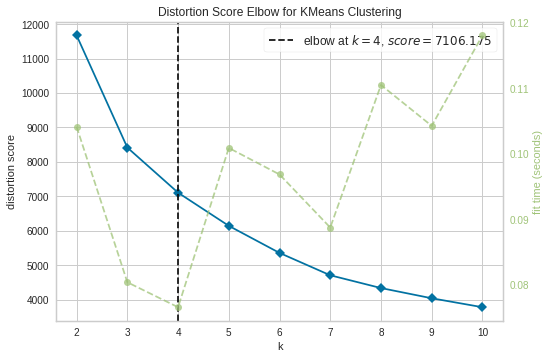

CPU times: user 4.08 s, sys: 147 ms, total: 4.23 s
Wall time: 1.37 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
%%time
k_means = KMeans()
elbow = KElbowVisualizer(k_means, k=(10))
elbow.fit(X_pca)
elbow.show()

### Now we perform clustering with GMM: PCA with 3 dimensions and without promotion features 
Evaluation: Akaike and Bayesian information criteria

In [55]:
from sklearn.mixture import GaussianMixture

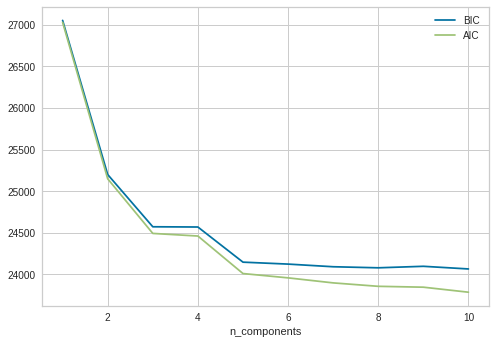

In [57]:
n_components = np.arange(1, 11)

models = [GaussianMixture(n, covariance_type='spherical', random_state=0).fit(X_pca) for n in n_components]

plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

#### Conclusion: 
For both K means and GMM, the estimated number of clusters could be 4